# Task 1 – Data Loading and data exploration

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(f'''
dataset shape: {df.shape}
----------------------------------------------------------------
data type: 
{df.dtypes}
----------------------------------------------------------------
missing values: 
{df.isnull().sum()}
----------------------------------------------------------------
Statistics description:
{df.describe(include = 'all')}
''')


dataset shape: (200, 5)
----------------------------------------------------------------
data type: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
----------------------------------------------------------------
missing values: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
----------------------------------------------------------------
Statistics description:
        CustomerID  Gender         Age  Annual Income (k$)   
count   200.000000     200  200.000000          200.000000  \
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     

In [4]:
# Observe the statistic data subset by gender

males_age = df[df['Gender']=='Male']['Age'] # subset with males age
females_age = df[df['Gender']=='Female']['Age'] # subset with females age

males_income = df[df['Gender']=='Male']['Annual Income (k$)'] # subset with males annual income
females_income = df[df['Gender']=='Female']['Annual Income (k$)'] # subset with females annual income

males_spending = df[df['Gender']=='Male']['Spending Score (1-100)'] # subset with males spending score
females_spending = df[df['Gender']=='Female']['Spending Score (1-100)'] # subset with females spending score

# Create the dataframe obtain the statistics according to gender
boxplot_statistics = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

boxplot_values = [males_age.describe()[stat] for stat in boxplot_statistics]
males_age_data = {'Statistics': boxplot_statistics, 'Male_age': boxplot_values}
males_age_stat = pd.DataFrame(males_age_data)

boxplot_values = [females_age.describe()[stat] for stat in boxplot_statistics]
females_age_data = {'Statistics': boxplot_statistics, 'Female_age': boxplot_values}
females_age_stat = pd.DataFrame(females_age_data)

boxplot_values = [males_income.describe()[stat] for stat in boxplot_statistics]
males_income_data = {'Statistics': boxplot_statistics, 'Males_income': boxplot_values}
males_income_stat = pd.DataFrame(males_income_data)

boxplot_values = [females_income.describe()[stat] for stat in boxplot_statistics]
females_income_data = {'Statistics': boxplot_statistics, 'Females_income': boxplot_values}
females_income_stat = pd.DataFrame(females_income_data)

boxplot_values = [males_spending.describe()[stat] for stat in boxplot_statistics]
males_spending_data = {'Statistics': boxplot_statistics, 'Males_spending': boxplot_values}
males_spending_stat = pd.DataFrame(males_spending_data)

boxplot_values = [females_spending.describe()[stat] for stat in boxplot_statistics]
females_spending_data = {'Statistics': boxplot_statistics, 'Females_spending': boxplot_values}
females_spending_stat = pd.DataFrame(females_spending_data)

stats_gender = pd.concat([males_age_stat,females_age_stat,males_income_stat,females_income_stat,males_spending_stat,females_spending_stat], axis = 1)
stats_gender = stats_gender.iloc[:, [0, 1, 3, 5, 7, 9, 11]]
print('Kolgomorov-Smirnov test p-value of male and female age: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))
print('Kolgomorov-Smirnov test p-value of male and female annual income: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))
print('Kolgomorov-Smirnov test p-value of male and female spending score: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))
stats_gender

Kolgomorov-Smirnov test p-value of male and female age: 0.49
Kolgomorov-Smirnov test p-value of male and female annual income: 0.78
Kolgomorov-Smirnov test p-value of male and female spending score: 0.29


,Statistics,Male_age,Female_age,Males_income,Females_income,Males_spending,Females_spending
0,count,88.000000,112.000000,88.000000,112.000000,88.000000,112.000000
1,mean,39.806818,38.098214,62.227273,59.250000,48.511364,51.526786
2,std,15.514812,12.644095,26.638373,26.011952,27.896770,24.114950
3,min,18.000000,18.000000,15.000000,16.000000,1.000000,5.000000
4,25%,27.750000,29.000000,45.500000,39.750000,24.500000,35.000000
5,50%,37.000000,35.000000,62.500000,60.000000,50.000000,50.000000
6,75%,50.500000,47.500000,78.000000,77.250000,70.000000,73.000000
7,max,70.000000,68.000000,137.000000,126.000000,97.000000,99.000000


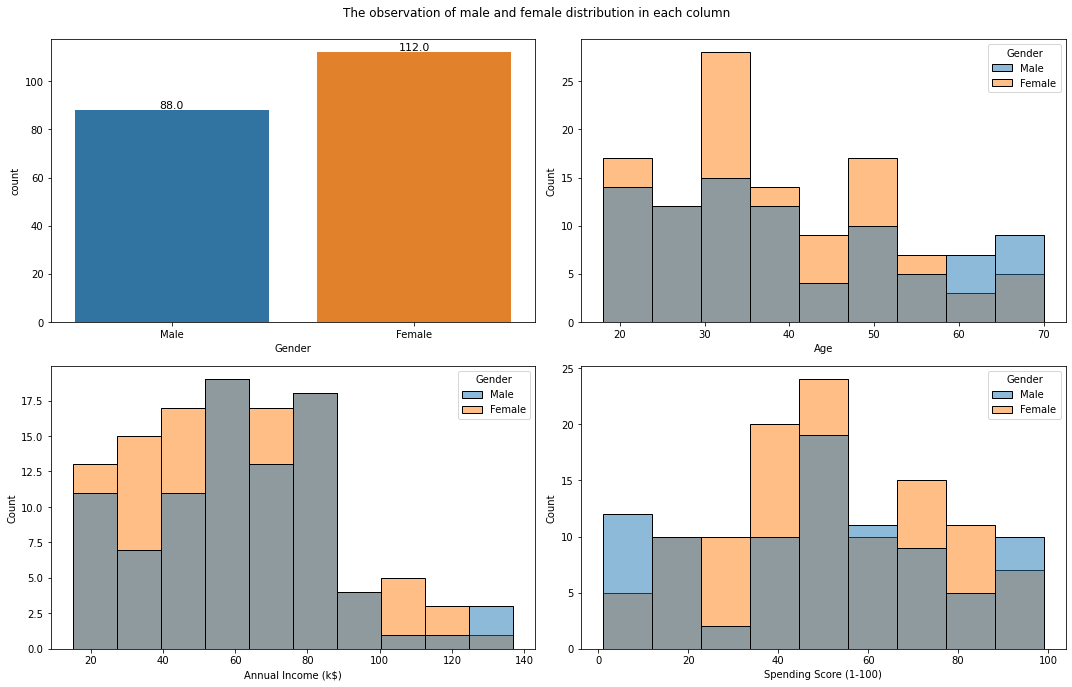

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('The observation of male and female distribution in each column')

ax = sns.countplot(ax=axes[0,0], data=df, x ='Gender', label = df['Gender'].value_counts())
# add annotations to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
sns.histplot(ax=axes[0,1], data=df, x ='Age', hue = 'Gender', multiple = 'layer')
sns.histplot(ax=axes[1,0], data=df, x ='Annual Income (k$)', hue = 'Gender', multiple = 'layer')
sns.histplot(ax=axes[1,1], data=df, x ='Spending Score (1-100)', hue = 'Gender', multiple = 'layer')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

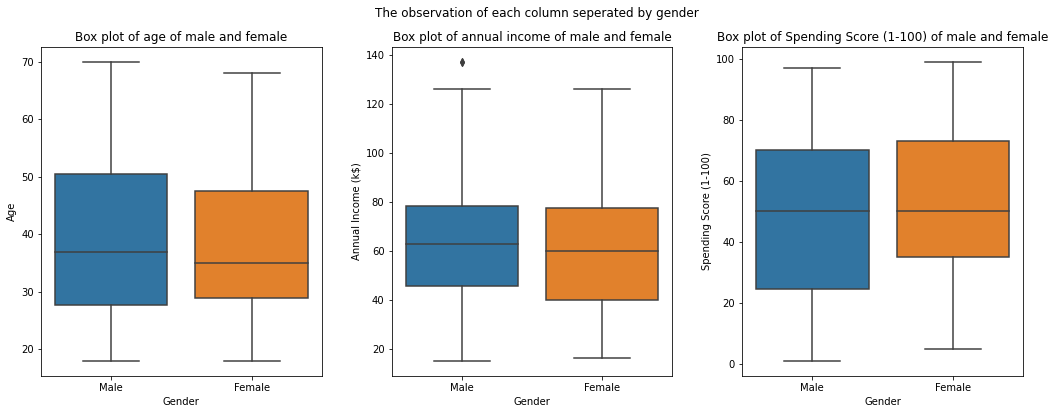

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
 
fig.suptitle('The observation of each column seperated by gender')
fig.axes[0].set_title('Box plot of age of male and female')
fig.axes[1].set_title('Box plot of annual income of male and female')
fig.axes[2].set_title('Box plot of Spending Score (1-100) of male and female')

sns.boxplot(ax=axes[0], data=df, x = 'Gender', y ='Age')
sns.boxplot(ax=axes[1], data=df, y ='Annual Income (k$)', x = "Gender")
sns.boxplot(ax=axes[2], data=df, y= 'Spending Score (1-100)', x = "Gender")

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

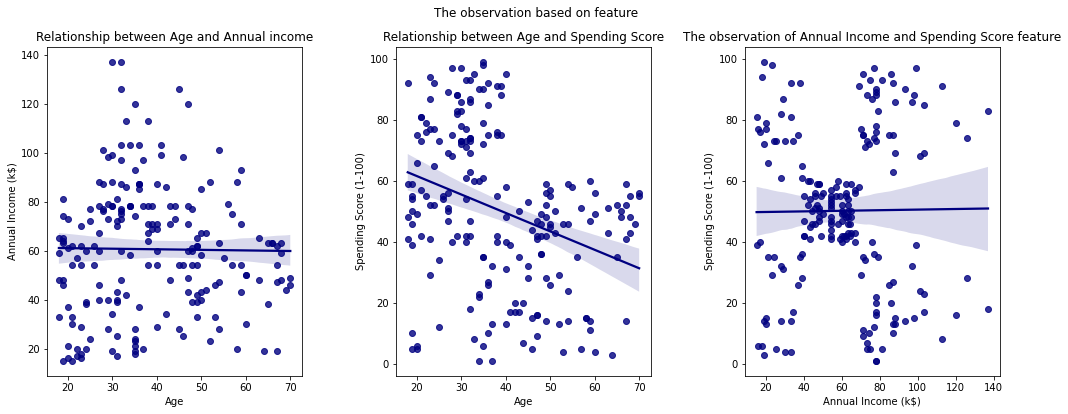

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
 
fig.suptitle('The observation based on feature')
fig.axes[0].set_title('Relationship between Age and Annual income')
fig.axes[1].set_title('Relationship between Age and Spending Score')
fig.axes[2].set_title('The observation of Annual Income and Spending Score feature')

sns.regplot(ax=axes[0], data=df, x="Age", y="Annual Income (k$)", color='navy')
sns.regplot(ax=axes[1], data=df, x="Age", y="Spending Score (1-100)", color='navy')
sns.regplot(ax=axes[2], data=df, x="Annual Income (k$)", y="Spending Score (1-100)", color='navy')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Text(0.5, 1.05, 'Pair plot of each column')

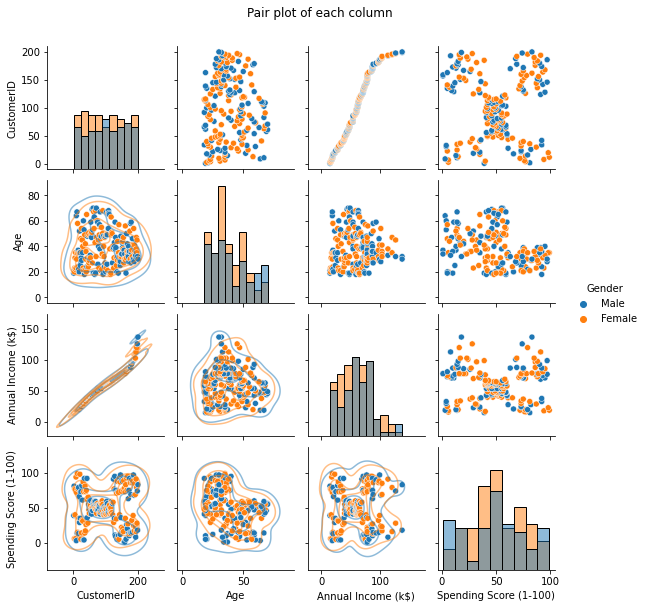

In [8]:
#  pair plot between each column
p = sns.pairplot(df, hue="Gender",diag_kind="hist", height=2)
p.map_lower(sns.kdeplot, levels=4, color=".2", alpha=.5)

plt.suptitle('Pair plot of each column', y = 1.05)

In [9]:
# transform categorical data into numerical values
# Perform one hot encoding for gender
one_hot_encoded = pd.get_dummies(df['Gender'])

# Add the new columns to the dataset
df = pd.concat([df, one_hot_encoded], axis=1)

# Remove the original gender column
df.drop('Gender', axis=1, inplace=True)
# Remove irrelevant columns
df.drop('CustomerID', axis=1, inplace=True)

df

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False
...,...,...,...,...,...
195,35,120,79,True,False
196,45,126,28,True,False
197,32,126,74,False,True
198,32,137,18,False,True


Text(0.5, 1.005, 'Correration matrix heatmap')

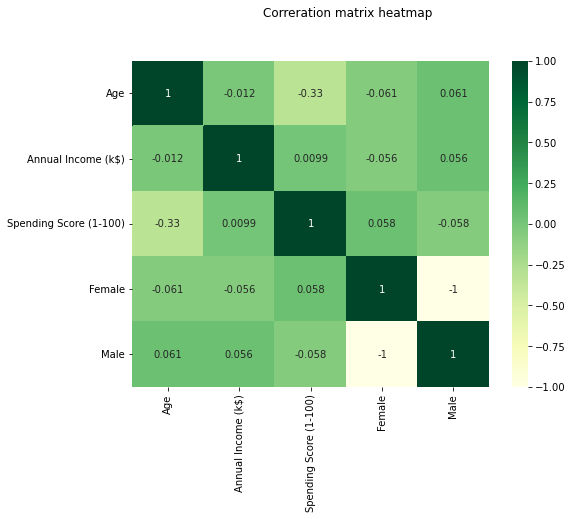

In [10]:
# observe the correlation heatmap between the features
fig, axes = plt.subplots(figsize=(8, 6))

sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='YlGn')
plt.suptitle('Correration matrix heatmap', y = 1.005)

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import prince
from sklearn.manifold import TSNE

In [12]:
# remove categorical data
df_nogender = df.drop(['Female','Male'], axis = 1)

# Scale the data
scaler = StandardScaler()
pca_no_gender_scaled = scaler.fit_transform(df_nogender)


In [13]:
# calculate PCA variance
pca = PCA()
pca.fit(pca_no_gender_scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(pca_no_gender_scaled)
variance_ratio = pca.explained_variance_ratio_
variance_ratio_pct = [round(x*100, 2) for x in variance_ratio]
print('Feature variance ratio:', variance_ratio_pct)

# Using only numerical data for PCA and T-SNE
# Create a PCA instance for 2 dimensions
pca_2D = PCA(n_components=2)
# Fit the data and transform it into 2 principal components
data_2D = pca_2D.fit_transform(pca_no_gender_scaled)

# Create a TSNE instance for 2 dimensions
tsne_2D = TSNE(n_components=2)
# Fit the data and transform it into 2 principal components
data_tsne_2D = tsne_2D.fit_transform(pca_no_gender_scaled)

Feature variance ratio: [44.27, 33.31, 22.43]


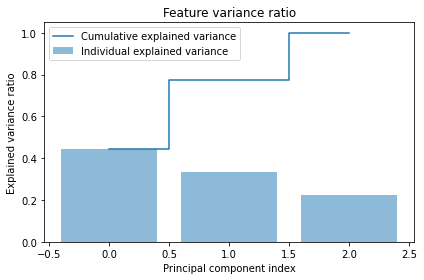

In [14]:
# source : https://vitalflux.com/pca-explained-variance-concept-python-example/
# visualizing the explained variance of each feature 
cum_sum_eigenvalues = np.cumsum(variance_ratio)
plt.bar(range(0,len(variance_ratio)), variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.title('Feature variance ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

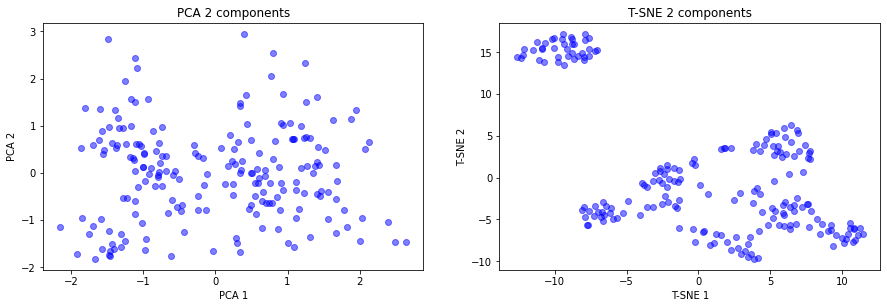

In [15]:
# Observe PCA and TNSE method
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221) 
plt.title("PCA 2 components")
plt.scatter(data_2D[:, 0], data_2D[:, 1],color='blue', alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

fig.add_subplot(222)
plt.title("T-SNE 2 components")
plt.scatter(data_tsne_2D[:, 0], data_tsne_2D[:, 1],color='blue', alpha=0.5)
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")

plt.show()

# Task 2 – Clustering

In [16]:
from sklearn.cluster import (KMeans,
                             DBSCAN,
                             AgglomerativeClustering)
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

## KMeans

In [17]:
# Elbow method for finding the number of cluster

# Compute within-cluster sum of squares (WCSS) for k values 1 to 10
# Using data that has been applied T-SNE for 2 components
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data_tsne_2D)
    wcss.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
elbow = pd.DataFrame({'k': range(1, 11), 'wcss': wcss})

In [18]:
# Silhouette Method

# create a list to store the silhouette scores for each k
silhouette_scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(data_tsne_2D)
    silhouette_avg = silhouette_score(data_tsne_2D, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores)

# create a dataframe with the k values and corresponding scores
silhouette = pd.DataFrame({'k': range(2, 11), 'Silhouette Score': silhouette_scores})

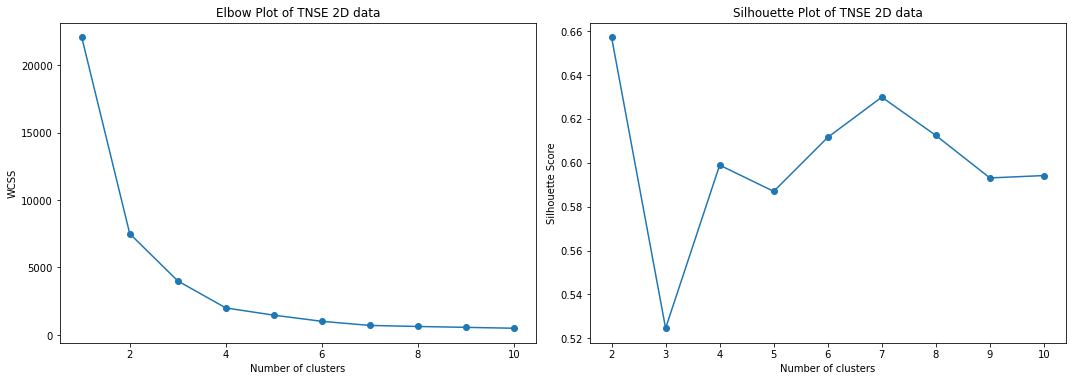

In [19]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221) 
# For elbow plot
plt.plot(elbow['k'].values, elbow['wcss'].values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot of TNSE 2D data')

fig.add_subplot(222) 
# For the silhouette plot
plt.plot(silhouette['k'].values, silhouette['Silhouette Score'].values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot of TNSE 2D data')

plt.tight_layout()
plt.show()

In [20]:
# Kmeans clustering of 4 cluster

kmean_model = KMeans(n_clusters=4, n_init = 10)
kmean_model.fit(data_tsne_2D)

# get the labels assigned to each data point
kmeans_labels = kmean_model.predict(data_tsne_2D)
centroids = kmean_model.cluster_centers_
kmeans_labels = kmean_model.labels_


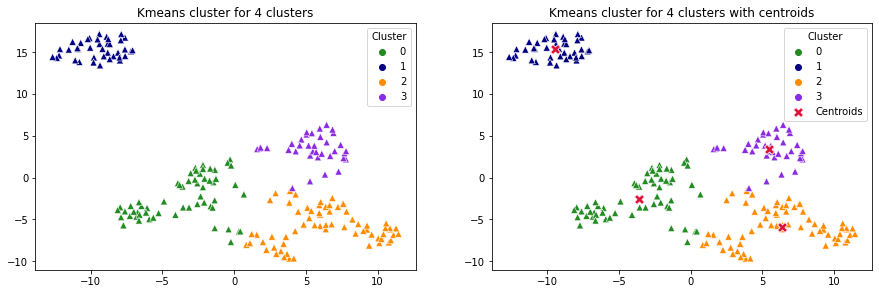

In [21]:
colors = ["forestgreen", "navy", "darkorange", "blueviolet"]

fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221)   #top left
plt.title('Kmeans cluster for 4 clusters')

sns.scatterplot(data = data_tsne_2D, x = data_tsne_2D[:,0], y = data_tsne_2D[:,1],hue=kmeans_labels, marker = '^', s=50, palette=colors)

plt.legend(title='Cluster', loc='upper right')

fig.add_subplot(222)   #top right
plt.title('Kmeans cluster for 4 clusters with centroids')

sns.scatterplot(data = data_tsne_2D, x = data_tsne_2D[:,0], y = data_tsne_2D[:,1],hue=kmeans_labels, marker = '^', s=50, palette=colors)

# plot the centroids on the same plot
sns.scatterplot(data = data_tsne_2D, x = centroids[:, 0], y = centroids[:, 1], color = 'crimson',label = 'Centroids',s=100,marker='X')

plt.legend(title='Cluster', loc='upper right')

## DBScan

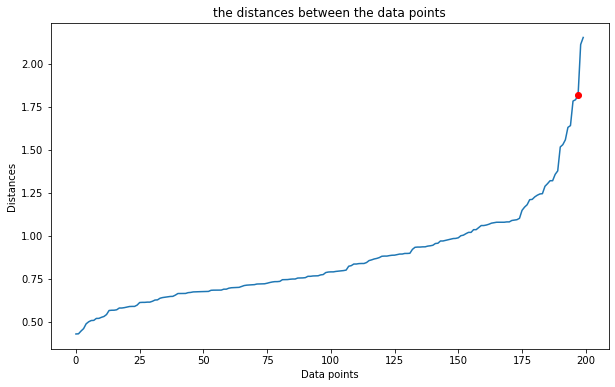

Maximum curvature distance: 1.82
Index of maximum curvature point: 197


In [22]:
# reference: https://www.section.io/engineering-education/dbscan-clustering-in-python/

neighb = NearestNeighbors(n_neighbors=4) # creating an object of the NearestNeighbors class
nbrs = neighb.fit(data_tsne_2D) # fitting the data to the object
distances,indices = nbrs.kneighbors(data_tsne_2D) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, -1] # Take the first column

# calculate second derivative of the curve
d2 = np.gradient(np.gradient(distances))

# find index of maximum second derivative
max_curvature_idx = np.argmax(d2)
min_curvature_idx = np.argmin(d2)

# plot the distances with the maximum curvature point marked
fig, axs = plt.subplots(figsize=(10, 6)) # setting the figure size
plt.plot(distances) # plotting the distances
plt.plot(max_curvature_idx, distances[max_curvature_idx], 'ro') # mark the maximum curvature point
plt.title('the distances between the data points')
plt.xlabel('Data points')
plt.ylabel('Distances')
plt.show()

# print the distance value and index of the maximum curvature point
print(f"Maximum curvature distance: {distances[max_curvature_idx]:.2f}")
print(f"Index of maximum curvature point: {max_curvature_idx}")

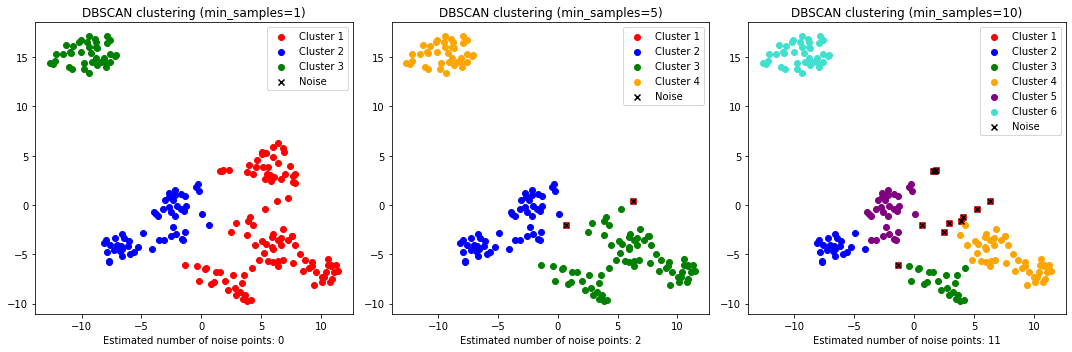

In [23]:
# Define a list of min_samples values to loop over
min_samples_values = [1, 5, 10]

# Calculate the number of subplots needed
num_subplots = len(min_samples_values)

# Calculate the number of rows and columns for the subplots grid
num_rows = 1
num_cols = 3

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Flatten the axes array if it is multidimensional
if num_subplots > 1:
    axes = axes.flatten()

for i, min_samples in enumerate(min_samples_values):
    # Compute DBSCAN
    db = DBSCAN(eps=1.82, min_samples=min_samples)
    db.fit(data_tsne_2D)
    dbscan_labels = db.labels_
    core_samples_mask = np.zeros_like(dbscan_labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    # Extract the cluster assignments and coordinates
    clusters = np.unique(dbscan_labels)
    n_clusters = len(clusters)
    coords = []
    for k, c in enumerate(clusters):
        coords.append(data_tsne_2D[dbscan_labels == c])

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise_ = list(dbscan_labels).count(-1)
    
    # Get the current axis for the subplot
    ax = axes[i]
    
    # Plot the clusters and noise
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'turquoise', 'pink', 'salmon', 'olive', 'coral', 'yellow', 'brown', 'teal', 'magenta', 'gray']
    for j in range(min(n_clusters_, len(colors))):
        ax.scatter(coords[j][:, 0], coords[j][:, 1], c=colors[j], label=f'Cluster {j+1}')
    ax.scatter(data_tsne_2D[dbscan_labels == -1, 0], data_tsne_2D[dbscan_labels == -1, 1], c='black', marker='x', label='Noise')
    ax.set_title(f'DBSCAN clustering (min_samples={min_samples})')
    ax.set_xlabel('Estimated number of noise points: %d' % n_noise_)
    ax.legend(loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Gaussian Mixture

In [24]:
# fit a GMM model with 4 components
gmm = GaussianMixture(n_components=4)
gmm.fit(data_tsne_2D)

# predict the cluster labels
gmm_labels = gmm.predict(data_tsne_2D)

In [25]:
# source: https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

import matplotlib as mpl
colors = ["forestgreen", "navy", "darkorange", "blueviolet"]

def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

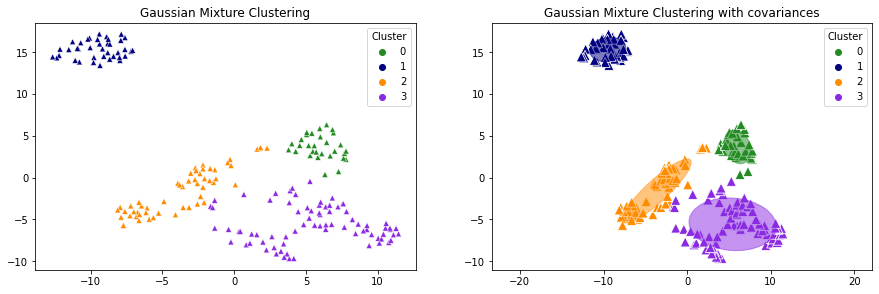

In [26]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221)   #top left
plt.title('Gaussian Mixture Clustering')
# plot the data points colored by their predicted cluster labels
sns.scatterplot(data = data_tsne_2D, x = data_tsne_2D[:,0], y = data_tsne_2D[:,1],hue=gmm_labels, marker='^', palette=colors)

plt.legend(title='Cluster', loc='upper right')

fig.add_subplot(222)   #top right
plt.title('Gaussian Mixture Clustering with covariances')

ax2 = sns.scatterplot(data = data_tsne_2D, x = data_tsne_2D[:,0], y = data_tsne_2D[:,1],hue=gmm_labels, marker='^', s=100, palette=colors)

make_ellipses(gmm, ax2)

plt.legend(title='Cluster', loc='upper right')

## Agglomerative

In [27]:
# apply agglomerative algorithm
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=4)
agglomerative_clusters = agglo_model.fit(data_tsne_2D)

# predict the cluster labels
agglo_labels = agglo_model.fit_predict(data_tsne_2D)

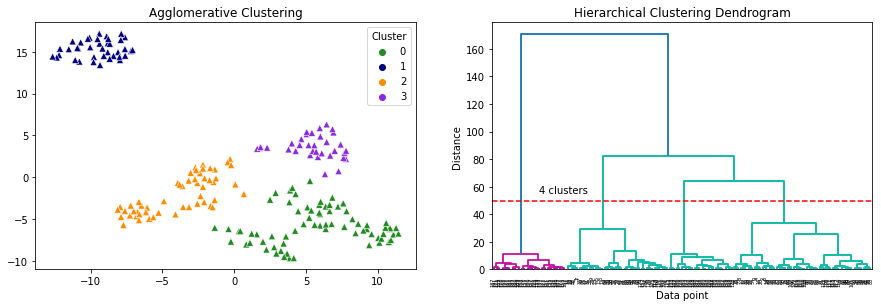

In [28]:
# visualization
from scipy.cluster import hierarchy
# compute the linkage matrix
Z = hierarchy.linkage(data_tsne_2D, method='ward')

fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221)
plt.title('Agglomerative Clustering')
# plot the data points colored by their predicted cluster labels
sns.scatterplot(data = data_tsne_2D, x = data_tsne_2D[:,0], y = data_tsne_2D[:,1],hue=agglo_labels, palette=colors, marker='^', s=50)
plt.legend(title='Cluster', loc='upper right')

fig.add_subplot(222)
plt.title('Hierarchical Clustering Dendrogram')
# plot the dendrogram
dendrogram = hierarchy.dendrogram(Z)

# set the x and y labels for the dendrogram
plt.xlabel('Data point')
plt.ylabel('Distance')
# highlight the clusters in the dendrogram
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.dendrogram(Z, color_threshold=agglo_model.distance_threshold)
# plot a horizontal line at the distance threshold
plt.hlines(y=50, xmin=0, xmax=3*dendrogram['icoord'][-1][2], colors='r', linestyles='dashed')
plt.annotate('4 clusters', xy = (350,55), xytext =(250, 55))

plt.grid(False)
plt.show()

In [29]:
cluster_eval = pd.DataFrame({'Model':['Kmeans', 'DBSCAN','Gaussian Mixture', 'Agglomerative'],
                             'Silhouette Score':[
                                 silhouette_score(data_tsne_2D, kmeans_labels), 
                                 silhouette_score(data_tsne_2D, dbscan_labels),
                                 silhouette_score(data_tsne_2D, gmm_labels),
                                 silhouette_score(data_tsne_2D, agglo_labels)],
                             'Calinski Harabasz Score':[
                                 calinski_harabasz_score(data_tsne_2D, kmeans_labels), 
                                 calinski_harabasz_score(data_tsne_2D, dbscan_labels), 
                                 calinski_harabasz_score(data_tsne_2D, gmm_labels), 
                                 calinski_harabasz_score(data_tsne_2D, agglo_labels)],
                            'Davies Bouldin Score':[
                                 davies_bouldin_score(data_tsne_2D, kmeans_labels),
                                 davies_bouldin_score(data_tsne_2D, dbscan_labels),
                                 davies_bouldin_score(data_tsne_2D, gmm_labels),
                                 davies_bouldin_score(data_tsne_2D, agglo_labels),
                            ]})

cluster_eval.sort_values(by=['Silhouette Score'], ascending=False)

,Model,Silhouette Score,Calinski Harabasz Score,Davies Bouldin Score
0,Kmeans,0.598877,658.177600,0.535024
3,Agglomerative,0.596338,634.748674,0.541101
1,DBSCAN,0.580351,723.032251,0.745579
2,Gaussian Mixture,0.555426,531.658284,0.586825


## Cluster Exploration

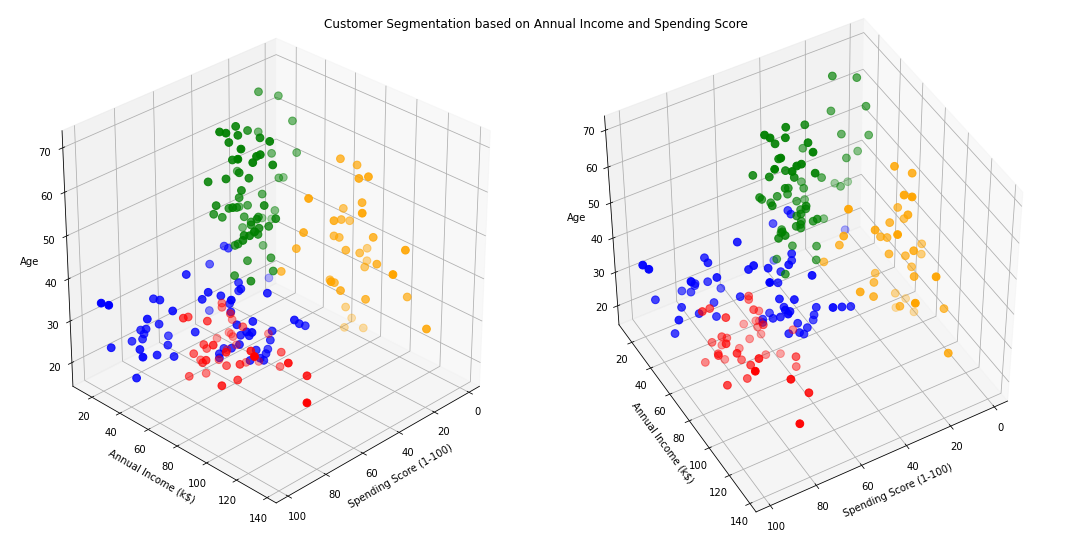

In [30]:
# 3D visualizing
# Using clustering from Kmeans model since it has the highest evaluation score
df["cluster"] = kmeans_labels

fig = plt.figure(figsize=(15, 15))
plt.suptitle("Customer Segmentation based on Annual Income and Spending Score")
angles = [45, 60]  # azimuth angles to display
elevvs = [30, 45]  # elev angles to display
for i, (elevvs, angle) in enumerate(zip(elevvs,angles)):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.scatter(df["Spending Score (1-100)"][df.cluster == 0], df["Annual Income (k$)"][df.cluster == 0], df["Age"][df.cluster == 0], c='blue', s=60)
    ax.scatter(df["Spending Score (1-100)"][df.cluster == 1], df["Annual Income (k$)"][df.cluster == 1], df["Age"][df.cluster == 1], c='red', s=60)
    ax.scatter(df["Spending Score (1-100)"][df.cluster == 2], df["Annual Income (k$)"][df.cluster == 2], df["Age"][df.cluster == 2], c='green', s=60)
    ax.scatter(df["Spending Score (1-100)"][df.cluster == 3], df["Annual Income (k$)"][df.cluster == 3], df["Age"][df.cluster == 3], c='orange', s=60)
    ax.scatter(df["Spending Score (1-100)"][df.cluster == 4], df["Annual Income (k$)"][df.cluster == 4], df["Age"][df.cluster == 4], c='purple', s=60)
    ax.view_init(elev=elevvs, azim=angle)
    plt.ylabel("Annual Income (k$)")
    plt.xlabel("Spending Score (1-100)")
    ax.set_zlabel("Age")

plt.tight_layout()

plt.show()

In [31]:
# Set color for plot clusters
colors = ["forestgreen", "navy", "darkorange", "blueviolet"]

# Obtain the cluster labels from Kmeans model
df['cluster'] = kmeans_labels

# Convert dummies data to categorical data
Gender = df[['Female','Male']]
Gender = pd.Series(Gender.columns[np.where(Gender !=0)[1]])
df['Gender'] = Gender
df.drop(df[['Female','Male']], axis=1, inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100),cluster,Gender
0,19,15,39,0,Male
1,21,15,81,0,Male
2,20,16,6,0,Female
3,23,16,77,0,Female
4,31,17,40,0,Female
...,...,...,...,...,...
195,35,120,79,1,Female
196,45,126,28,3,Female
197,32,126,74,1,Male
198,32,137,18,3,Male


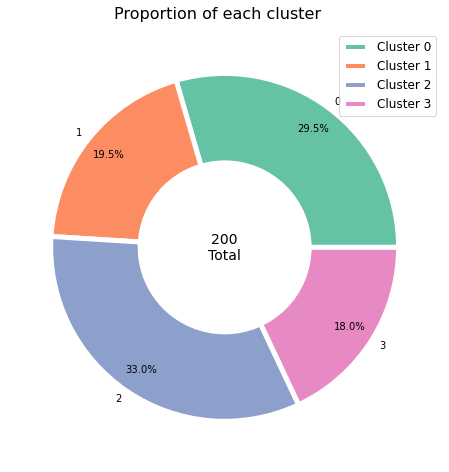

In [32]:
# Create data for the pie chart
cluster_counts = df['cluster'].value_counts().sort_index()
total_count = len(df)
sizes = cluster_counts.values
labels = cluster_counts.index.tolist()

# create a donut plot
fig, ax = plt.subplots(figsize=(8, 8))

# outer ring representing clusters
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360, pctdistance=0.85, labeldistance=1.05, colors=["#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854"],wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig.gca().add_artist(centre_circle)

# add text in the center of the plot
total_count = len(df)
plt.text(0, 0, f"{total_count}\nTotal", ha="center", va="center", fontsize=14)

# add labels to wedges
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
ax.legend(labels, loc="best", fontsize=12)
plt.suptitle("Proportion of each cluster", y=0.92, fontsize=16)
plt.show()

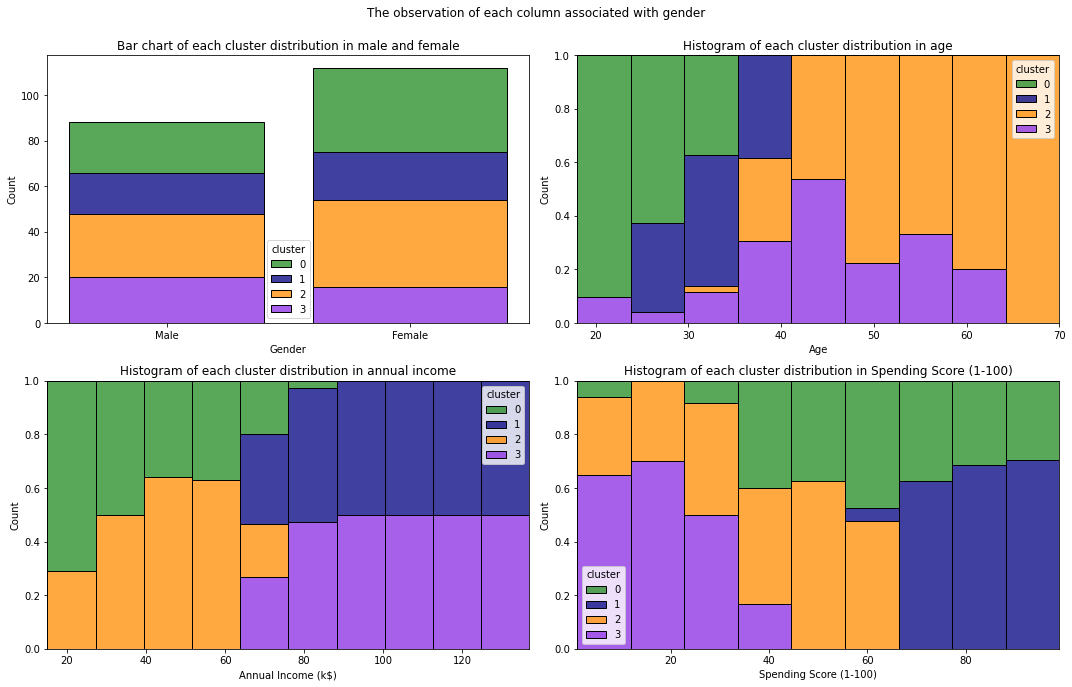

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
fig.suptitle('The observation of each column associated with gender')
fig.axes[0].set_title('Bar chart of each cluster distribution in male and female')
fig.axes[1].set_title('Histogram of each cluster distribution in age')
fig.axes[2].set_title('Histogram of each cluster distribution in annual income')
fig.axes[3].set_title('Histogram of each cluster distribution in Spending Score (1-100)')

sns.histplot(ax=axes[0,0], data=df, x = 'Gender', hue = 'cluster', multiple = 'stack', palette = colors, shrink = 0.8)
sns.histplot(ax=axes[0,1], data=df, x = 'Age', hue = 'cluster', multiple = 'fill', palette = colors)
sns.histplot(ax=axes[1,0], data=df, x ='Annual Income (k$)', hue = 'cluster', multiple = 'fill', palette = colors)
sns.histplot(ax=axes[1,1], data=df, x ='Spending Score (1-100)', hue = 'cluster', multiple = 'fill', palette = colors)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

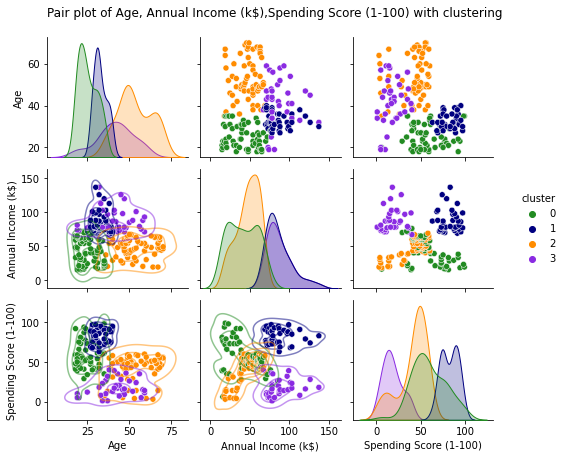

In [34]:
colors = ["forestgreen", "navy", "darkorange", "blueviolet"]

# Pair plot with cluster labels
g = sns.pairplot(df, hue="cluster",height=2, palette=colors)
g.map_lower(sns.kdeplot, levels=4, color=".2", alpha=.5)

g.fig.set_figheight(6)
g.fig.set_figwidth(8)
plt.suptitle('Pair plot of Age, Annual Income (k$),Spending Score (1-100) with clustering', y = 1.05)
plt.show()

## Customer segmentations

Based on the result of the K-means clustering, customers could be segmented into four segmentations.
- Group 1: Young customer and low income.
- Group 2: Young customer and high income. <b>(potential target customer)</b>
- Group 3: Old customer and low income.
- Group 4: Old customer and high income. <b>(potential target customer)</b>

## Age vs Spending score

In [35]:
# select only 'Age', 'Spending Score (1-100)' columns
Y = df[['Age', 'Spending Score (1-100)']].values

# Set color for plot clusters
colors = ["forestgreen", "navy", "darkorange", "blueviolet"]

In [36]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
elbow = pd.DataFrame({'k': range(1, 11), 'wcss': wcss})

# Silhouette Method

# create a list to store the silhouette scores for each k
silhouette_scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(Y)
    silhouette_avg = silhouette_score(Y, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores)

# create a dataframe with the k values and corresponding scores
silhouette = pd.DataFrame({'k': range(2, 11), 'Silhouette Score': silhouette_scores})

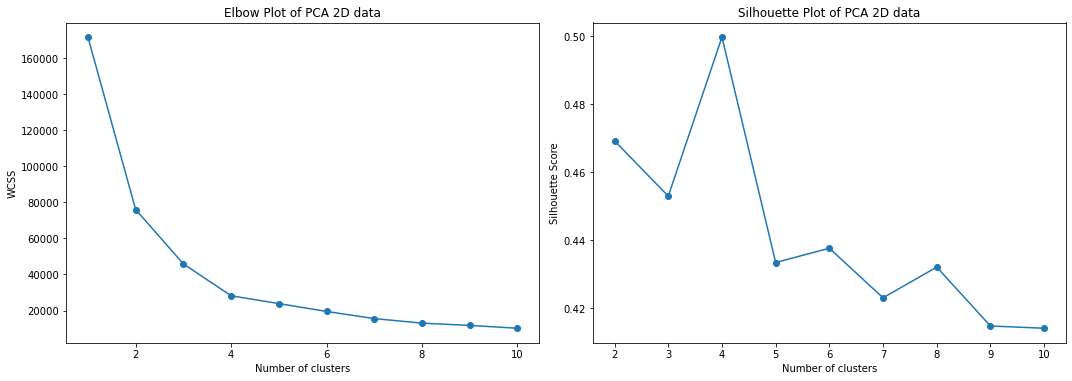

In [37]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221) 
# For elbow plot
plt.plot(elbow['k'].values, elbow['wcss'].values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot of PCA 2D data')

fig.add_subplot(222) 
# For the silhouette plot
plt.plot(silhouette['k'].values, silhouette['Silhouette Score'].values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot of PCA 2D data')

plt.tight_layout()
plt.show()

In [38]:
kmean_model = KMeans(n_clusters=4, n_init = 10)
kmean_model.fit(Y)

# get the labels assigned to each data point
kmeans_labels_y = kmean_model.predict(Y)
centroids = kmean_model.cluster_centers_
kmeans_labels_y = kmean_model.labels_

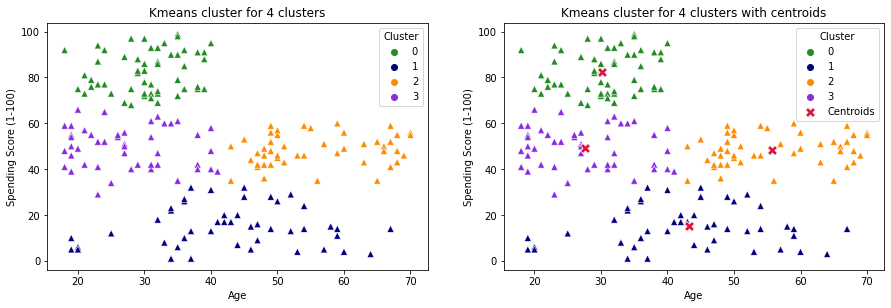

In [39]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221)   #top left
plt.title('Kmeans cluster for 4 clusters')

sns.scatterplot(data = df, x = df['Age'], y = df['Spending Score (1-100)'],hue=kmeans_labels_y, palette=colors, marker = '^', s=50)

plt.legend(title='Cluster', loc='upper right')

fig.add_subplot(222)   #top right
plt.title('Kmeans cluster for 4 clusters with centroids')

sns.scatterplot(data = df, x = df['Age'], y = df['Spending Score (1-100)'],hue=kmeans_labels_y, palette=colors, marker = '^', s=50)

# plot the centroids on the same plot
sns.scatterplot(data = Y, x = centroids[:, 0], y = centroids[:, 1], color = 'crimson',label = 'Centroids',s=100,marker='X')

plt.legend(title='Cluster', loc='upper right')

## Four target groups of customer

Based on Age and Spending score feature, there are four customer segmentations as the following;
- Group 1: Customer in all age groups and low spending score (which might not be useful)
- Group 2: Customer who are younger to middle age and average spending score
- Group 3: Customer who are middle to older age and average spending score
- Group 4: Customer who are young to middle age and high spending score <b>(potentially target group)</b>

## Annual Income vs Spending score

In [40]:
# select only 'Annual Income (k$)', 'Spending Score (1-100)' columns
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Set color for plot clusters
colors = ["turquoise", "forestgreen", "navy", "darkorange", "blueviolet"]

In [41]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
elbow = pd.DataFrame({'k': range(1, 11), 'wcss': wcss})

# Silhouette Method

# create a list to store the silhouette scores for each k
silhouette_scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores)

# create a dataframe with the k values and corresponding scores
silhouette = pd.DataFrame({'k': range(2, 11), 'Silhouette Score': silhouette_scores})

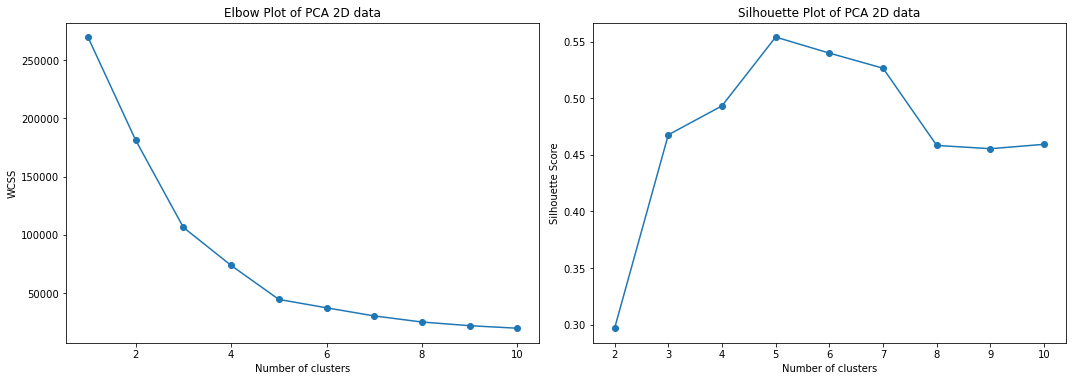

In [42]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221) 
# For elbow plot
plt.plot(elbow['k'].values, elbow['wcss'].values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot of PCA 2D data')

fig.add_subplot(222) 
# For the silhouette plot
plt.plot(silhouette['k'].values, silhouette['Silhouette Score'].values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot of PCA 2D data')

plt.tight_layout()
plt.show()

In [43]:
kmean_model = KMeans(n_clusters=5, n_init = 10)
kmean_model.fit(X)

# get the labels assigned to each data point
kmeans_labels_x = kmean_model.predict(X)
centroids = kmean_model.cluster_centers_
kmeans_labels_x = kmean_model.labels_

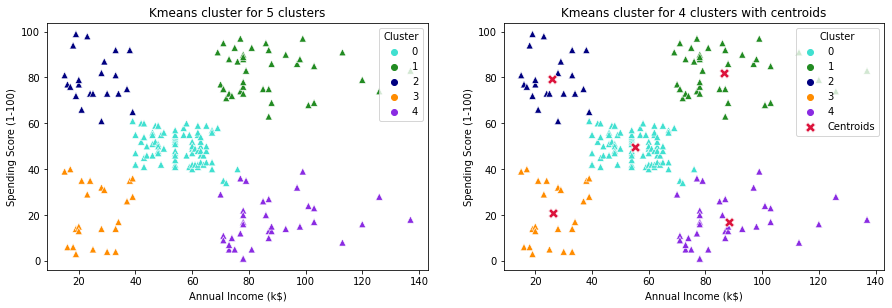

In [44]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(221)   #top left
plt.title('Kmeans cluster for 5 clusters')

sns.scatterplot(data = df, x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'],hue=kmeans_labels_x, palette=colors, marker = '^', s=50)

plt.legend(title='Cluster', loc='upper right')

fig.add_subplot(222)   #top right
plt.title('Kmeans cluster for 4 clusters with centroids')

sns.scatterplot(data = df, x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'],hue=kmeans_labels_x, palette=colors, marker = '^', s=50)

# plot the centroids on the same plot
sns.scatterplot(data = Y, x = centroids[:, 0], y = centroids[:, 1], color = 'crimson',label = 'Centroids',s=100,marker='X')

plt.legend(title='Cluster', loc='upper right')

## Five target groups of customer

Based on Annual income and Spending score features, there are five customer segmentations as following;
- Group 1: High annual income and low spending score.
- Group 2: Average annual income and average spending score <b>(potential target group since majority of the customer are belong to this group)</b>
- Group 3: High income and high spending score <b>(potential target group)</b>
- Group 4: Low income and low spending score
- Group 5: Low income and high spending score